<a href="https://colab.research.google.com/github/Athitiya00/multivariate/blob/main/Multivariate_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ
1. ข้อมูลโจทย์ อยู่ใน ตัวแปร ```Data```
2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ
3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ
4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
5. เขียน comments อธิบายทุกขั้นตอน
6. อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist 
7. commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.

กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

In [1]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas

In [2]:
Name = 'อาธิติยา ธรรมวงษา'
ID = '623021058-0'

In [3]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [4]:
Data = DataGenerator(Name,ID)

021:22:14


In [5]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,-9.426576,-4.376342,3.475123,-9.964274,-7.473798,-8.877976,-5.008762,6.322720,-3.828949,1.867419,-8.083785,7.770605,-6.873573,-6.108583,0.318526,8.018442,4.662985,8.758816,5.459240,-2.219485,-1.991638,3.436048,-8.752684,19.180239
1,-1.504680,-4.798100,-9.477033,7.594804,8.830604,9.330478,8.785840,-8.155954,7.534038,-9.153681,8.121219,6.385155,8.018150,5.199183,8.194834,5.343283,8.596106,-8.518229,2.092111,6.203299,7.313643,-9.502662,-9.596201,-45.513311
2,-0.724281,-3.474088,-7.808672,9.030851,8.839823,8.814363,9.691501,-9.396026,7.542054,-8.843869,8.885087,4.696764,7.429579,5.172997,6.781114,4.759322,8.378016,-8.474100,3.362103,6.338624,8.772902,-9.134738,-6.948176,-43.673691
3,8.037503,7.536090,4.304222,1.368213,7.655374,5.877472,-10.673538,3.329210,1.672791,-0.114393,-2.519571,-3.016721,-4.771517,6.474865,5.012202,-6.992676,3.322683,6.385760,6.283564,-3.763382,-4.210971,-4.080487,15.072180,-18.402434
4,-0.643676,-5.098232,6.426570,-2.833146,-4.292058,-3.105426,2.996073,-3.192412,-4.275848,6.586916,1.208168,5.088648,8.835935,-5.743763,0.456918,-6.460829,9.504938,5.275986,2.749596,-6.231896,8.339736,-10.052189,-10.196465,-48.260945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.471211,-3.878440,4.976258,-2.952263,-6.353971,-2.629481,4.286065,-2.341729,-4.328366,8.389839,1.109955,5.005765,9.732920,-4.022717,-1.276452,-7.988043,9.769834,6.570557,4.351780,-4.629683,8.995164,-8.866562,-7.756880,-42.332809
9996,-10.560733,-6.007623,5.014512,-12.238524,-5.664494,-10.884708,-2.081247,4.273204,-4.103752,1.356016,-10.396789,7.701799,-7.347034,-6.822259,0.699940,6.524154,6.611412,7.812663,3.459987,-2.957703,-1.717942,3.612419,-12.015246,20.062094
9997,-0.274193,-5.624442,-4.132013,-3.784893,-7.780816,5.146189,4.412614,-9.097709,-5.357306,-3.464257,6.210606,-0.096741,0.517492,-4.799790,1.843947,6.922275,12.290972,-8.767819,0.280662,-7.123301,5.770248,3.728265,-11.248883,20.641323
9998,-6.004195,6.431052,7.613415,5.964495,-0.585159,-8.024162,-3.890882,-3.630688,-2.221155,-0.537819,-0.668570,-6.532314,7.532070,3.238244,5.107010,-6.098886,2.428073,3.820027,-2.835451,-0.432642,4.799660,2.761357,12.862104,15.806783


In [6]:
Data.shape#ดูนาดของข้อมูล

(10000, 24)

In [7]:
corr = np.corrcoef(Data.to_numpy().T)

In [8]:
corr.shape 

(24, 24)

In [ ]:
corr

In [10]:
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if (i !=j) and (corr[i,j] == 1.):
            print(f'row = {i} column = {j} corrcoef = {corr[i,j]}')
#หาค่า correlation ที่ซ้ำกัน

row = 1 column = 22 corrcoef = 1.0
row = 21 column = 23 corrcoef = 1.0
row = 22 column = 1 corrcoef = 1.0
row = 23 column = 21 corrcoef = 1.0


จากการวนลูปพบว่าค่าที่มีค่าที่เท่ากันหรือซ้ำกัน จึงจำเป็นที่จะต้องตัดข้อมูลออกก่อนนำไปใช้ โดยการแสดงข้อมูลทั้งหมด

In [12]:
newdata = Data.iloc[1:,:24]
newdata

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
1,-1.504680,-4.798100,-9.477033,7.594804,8.830604,9.330478,8.785840,-8.155954,7.534038,-9.153681,8.121219,6.385155,8.018150,5.199183,8.194834,5.343283,8.596106,-8.518229,2.092111,6.203299,7.313643,-9.502662,-9.596201,-45.513311
2,-0.724281,-3.474088,-7.808672,9.030851,8.839823,8.814363,9.691501,-9.396026,7.542054,-8.843869,8.885087,4.696764,7.429579,5.172997,6.781114,4.759322,8.378016,-8.474100,3.362103,6.338624,8.772902,-9.134738,-6.948176,-43.673691
3,8.037503,7.536090,4.304222,1.368213,7.655374,5.877472,-10.673538,3.329210,1.672791,-0.114393,-2.519571,-3.016721,-4.771517,6.474865,5.012202,-6.992676,3.322683,6.385760,6.283564,-3.763382,-4.210971,-4.080487,15.072180,-18.402434
4,-0.643676,-5.098232,6.426570,-2.833146,-4.292058,-3.105426,2.996073,-3.192412,-4.275848,6.586916,1.208168,5.088648,8.835935,-5.743763,0.456918,-6.460829,9.504938,5.275986,2.749596,-6.231896,8.339736,-10.052189,-10.196465,-48.260945
5,7.688778,6.936452,2.622817,0.924338,7.582977,5.047302,-11.238402,3.530901,2.979700,-1.214419,1.024132,-2.367583,-5.368529,5.219433,3.753264,-5.530650,5.422460,6.861780,4.034253,-5.124204,-4.451557,-4.871067,13.872903,-22.355335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.471211,-3.878440,4.976258,-2.952263,-6.353971,-2.629481,4.286065,-2.341729,-4.328366,8.389839,1.109955,5.005765,9.732920,-4.022717,-1.276452,-7.988043,9.769834,6.570557,4.351780,-4.629683,8.995164,-8.866562,-7.756880,-42.332809
9996,-10.560733,-6.007623,5.014512,-12.238524,-5.664494,-10.884708,-2.081247,4.273204,-4.103752,1.356016,-10.396789,7.701799,-7.347034,-6.822259,0.699940,6.524154,6.611412,7.812663,3.459987,-2.957703,-1.717942,3.612419,-12.015246,20.062094
9997,-0.274193,-5.624442,-4.132013,-3.784893,-7.780816,5.146189,4.412614,-9.097709,-5.357306,-3.464257,6.210606,-0.096741,0.517492,-4.799790,1.843947,6.922275,12.290972,-8.767819,0.280662,-7.123301,5.770248,3.728265,-11.248883,20.641323
9998,-6.004195,6.431052,7.613415,5.964495,-0.585159,-8.024162,-3.890882,-3.630688,-2.221155,-0.537819,-0.668570,-6.532314,7.532070,3.238244,5.107010,-6.098886,2.428073,3.820027,-2.835451,-0.432642,4.799660,2.761357,12.862104,15.806783


### 2.ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ

In [13]:
from sklearn.cluster import KMeans
#import function ที่ต้องการใช้ในการทำ K-mean

In [14]:
kmeans = KMeans(random_state=2021)
#กำหนดค่า k  (ถ้ามีค่า defult ไม่ต้องกำหนดค่า k ก็ได้)
#random_state=2021 กำหนดให้เริ่มสุ่มที่จุดเดียวกัน จะได้มีการจัดกลุ่มเหมือนกัน

In [15]:
kmeans.fit(Data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

In [16]:
kmeans.cluster_centers_
#แสดงจุดที่คำนวณได้

array([[ 8.75148255e+00,  3.31769091e+00,  5.16476459e+00,
         3.21028449e+00,  7.06311452e+00,  6.21244919e+00,
        -2.97622061e+00,  1.27683308e+00, -1.13630076e+00,
         2.94654038e+00, -4.17978379e+00, -2.37989579e+00,
        -4.83385771e+00,  3.58550580e+00,  5.96692804e+00,
        -5.03215197e+00,  5.64722462e+00,  5.82799454e+00,
         4.06651751e+00, -5.29669640e+00,  1.50359699e+00,
        -2.61990442e+00,  6.63538182e+00, -1.10995221e+01],
       [-2.19357221e+00,  5.86065519e+00, -2.56998095e-01,
         3.14996790e+00,  5.51535315e+00,  2.32198318e+00,
        -1.52182913e+00,  4.43533112e+00, -4.25709706e+00,
         2.39373283e+00, -4.91990332e+00, -1.07339254e+00,
         3.98769950e+00, -3.35847945e-01,  1.89566033e+00,
        -2.43171061e+00,  3.42558794e+00,  2.76557846e+00,
        -2.87133152e+00,  2.84950105e+00,  4.06829614e+00,
         1.97885653e+00,  1.17213104e+01,  1.18942827e+01],
       [-2.09144815e+00, -3.89009327e+00, -8.73346976e

In [17]:
y = kmeans.predict(Data)
y
#ทดสอบการจัดกลุ่มของ Data

array([4, 2, 2, ..., 4, 1, 0], dtype=int32)

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA(n_components=2)

In [20]:
new_pca = pca.fit_transform(newdata)

In [21]:
import matplotlib.pyplot as plt

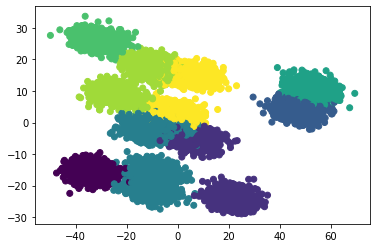

In [22]:
kmeans = KMeans(random_state=2021)
kmeans.fit(newdata)
y = kmeans.predict(newdata)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)

หาค่า k ที่เหมาะสมของ data ด้วยวิธี " The elbow method "

In [24]:
kmeans.inertia_
#คำนวนค่า SSE

3458078.593224128

In [25]:
SSE = list()
for k in [1,2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters = k , random_state = 2021)
    XX = kmeans.fit(Data)
    SSE.append(kmeans.inertia_)

In [26]:
SSE

[13996402.01220335,
 9375315.324471194,
 7668905.442202804,
 6546208.95669611,
 5465351.337933444,
 4728825.967559841,
 4058229.078380168,
 3303806.5447469153]

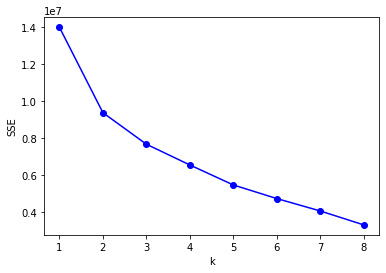

In [33]:
plt.plot([1,2,3,4,5,6,7,8],SSE,'o-b')
plt.xlabel('k')
plt.ylabel('SSE');
#นำค่า SSE ที่ได้มา plot กราฟเพื่อดูว่ามี k กี่กลุ่ม

หาค่า k ด้วยวิธี " The silhouette coefficient"

In [28]:
from sklearn import metrics
#import function metrics มาใช้

In [29]:
SilH = list()
for k in [2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters = k , random_state = 2021)
    kmeans.fit(Data)
    score = metrics.silhouette_score(Data,kmeans.labels_)
    SilH.append(score)

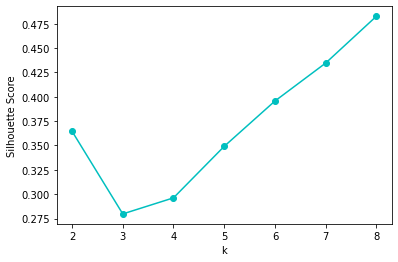

In [32]:
plt.plot([2,3,4,5,6,7,8],SilH,'o-c')
plt.xlabel('k')
plt.ylabel('Silhouette Score');

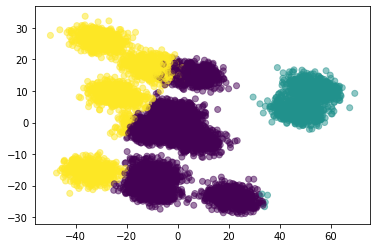

In [34]:
kmeans = KMeans(n_clusters= 3,random_state=2021)
kmeans.fit(newdata)
y = kmeans.predict(newdata)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y,alpha=0.5)

จากกราฟจะบอกได้ว่ามี k ทั้งหมด 3 กลุ่ม และมีข้อมูลบางส่วนที่ทับซ้อนก่อน

### 3.ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ

ใช้วิธี MDS Multidimensional Scaling

In [36]:
from sklearn.manifold import MDS

In [40]:
mds = MDS(n_components=2)